In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/content/Loan_Default_Prediction.csv')

In [3]:
# See the no. of rows and columns
df.shape

(1000, 11)

In [4]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Customer_ID', 'Age', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Employment_Status', 'Existing_Debt', 'Marital_Status', 'Loan_Purpose', 'Default']


In [5]:
# Display data type of each feature
df.dtypes

,0
Customer_ID,object
Age,int64
Annual_Income,float64
Credit_Score,int64
Loan_Amount,float64
Loan_Term,int64
Employment_Status,object
Existing_Debt,float64
Marital_Status,object
Loan_Purpose,object


In [6]:
df.describe()

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Existing_Debt,Default
count,1000.000000,931.000000,1000.000000,893.000000,1000.000000,1000.000000,1000.000000
mean,44.083000,88363.067239,583.540000,25869.768304,35.832000,9958.808841,0.506000
std,14.891738,35560.812929,156.310266,14146.117006,16.952733,5763.715016,0.500214
min,18.000000,25024.919845,301.000000,1060.260726,12.000000,34.078070,0.000000
25%,32.000000,58328.415869,449.750000,13437.579783,24.000000,4804.871153,0.000000
50%,45.000000,88350.524300,580.500000,25646.016726,36.000000,9938.202615,1.000000
75%,57.000000,118353.301368,718.000000,38370.639280,48.000000,15055.647364,1.000000
max,69.000000,149778.644411,849.000000,49976.185077,60.000000,19979.206144,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        1000 non-null   object 
 1   Age                1000 non-null   int64  
 2   Annual_Income      931 non-null    float64
 3   Credit_Score       1000 non-null   int64  
 4   Loan_Amount        893 non-null    float64
 5   Loan_Term          1000 non-null   int64  
 6   Employment_Status  888 non-null    object 
 7   Existing_Debt      1000 non-null   float64
 8   Marital_Status     1000 non-null   object 
 9   Loan_Purpose       1000 non-null   object 
 10  Default            1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [8]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Age,0
Annual_Income,69
Credit_Score,0
Loan_Amount,107
Loan_Term,0
Employment_Status,112
Existing_Debt,0
Marital_Status,0
Loan_Purpose,0


In [17]:
# Remove unwanted columns
df.drop(columns=['Age'], inplace=True,axis=1)  # specify the columns to remove

In [18]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [19]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [20]:
# find the null values
df.isnull().sum()

,0
Customer_ID,0
Annual_Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Employment_Status,0
Existing_Debt,0
Loan_Purpose,0
Default,0


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [24]:

X = df.drop('Default', axis=1)
y = df['Default']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [71]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [73]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.46
Logistic Regression Confusion Matrix:
 [[19 41]
 [13 27]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [76]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.52
Random Forest Confusion Matrix:
 [[28 32]
 [16 24]]


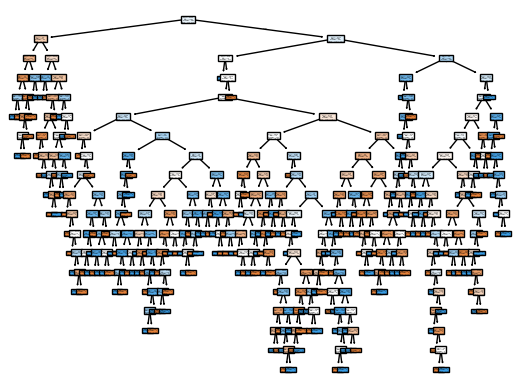

In [77]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [78]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [80]:
import pickle

with open('team_bajrang.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'team_bajrang.pkl'")

Best model saved as 'team_bajrang.pkl'
